# The Data Incubator Fellowship Project: Disney Waiting Times

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

upload the data sets. https://touringplans.com/walt-disney-world/crowd-calendar#DataSets
14 ride files, 1 metadata file, 1 entitites file.

In [2]:
dwarfs = pd.read_csv('../7_dwarfs_train.csv', sep=',')
alien = pd.read_csv('../alien_saucers.csv', sep=',')
dinosaur = pd.read_csv('../dinosaur.csv', sep=',')
everest = pd.read_csv('../expedition_everest.csv', sep=',')
flight = pd.read_csv('../flight_of_passage.csv', sep=',')
safari = pd.read_csv('../kilimanjaro_safaris.csv', sep=',')
navi = pd.read_csv('../navi_river.csv', sep=',')
pirates = pd.read_csv('../pirates_of_caribbean.csv', sep=',')
aerosmith = pd.read_csv('../rock_n_rollercoaster.csv', sep=',')
slinky = pd.read_csv('../slinky_dog.csv', sep=',')
soarin = pd.read_csv('../soarin.csv', sep=',')
spaceship = pd.read_csv('../spaceship_earth.csv', sep=',')
splash = pd.read_csv('../splash_mountain.csv', sep=',')
toystory = pd.read_csv('../toy_story_mania.csv', sep=',')
metadata = pd.read_csv('../metadata.csv', sep=',')
entities = pd.read_csv('../entities.csv', sep=',')

In [3]:
entities

,name,short_name,land,average_wait_per_hundred,opened_on,duration
0,Kilimanjaro Safaris,Kilimanjaro Safaris,Africa,4,04/22/1998,20
1,Expedition Everest - Legend of the Forbidden M...,Expedition Everest,Asia,4,04/07/2006,4
2,DINOSAUR,DINOSAUR,DinoLand U.S.A.,3,04/22/1998,4
3,Na'vi River Journey,Na'vi River,Pandora - The World of Avatar,5,05/27/2017,5
4,Avatar Flight of Passage,Flight of Passage,Pandora - The World of Avatar,4,05/27/2017,6
5,Spaceship Earth,Spaceship Earth,Future World,3,10/01/1982,16
6,Soarin',Soarin',Future World,4,05/05/2005,6
7,Slinky Dog Dash,Slinky Dog,Toy Story Land,5,06/30/2018,3
8,Alien Swirling Saucers,Alien Saucers,Toy Story Land,10,06/30/2018,3
9,Rock 'n' Roller Coaster Starring Aerosmith,Rock Coaster,Sunset Boulevard,3,07/29/1999,2


In [4]:
metadata.head()

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN


In [5]:
dwarfs.tail(5)

,date,datetime,SPOSTMIN,SACTMIN
257287,06/30/2019,2019-06-30 21:27:00,80.0,NaN
257288,06/30/2019,2019-06-30 21:34:00,80.0,NaN
257289,06/30/2019,2019-06-30 21:41:00,80.0,NaN
257290,06/30/2019,2019-06-30 21:48:00,80.0,NaN
257291,06/30/2019,2019-06-30 21:55:00,80.0,NaN


## Preparing, cleaning and visualizing the data
we will work only with the date, the hour and SPOSTMIN

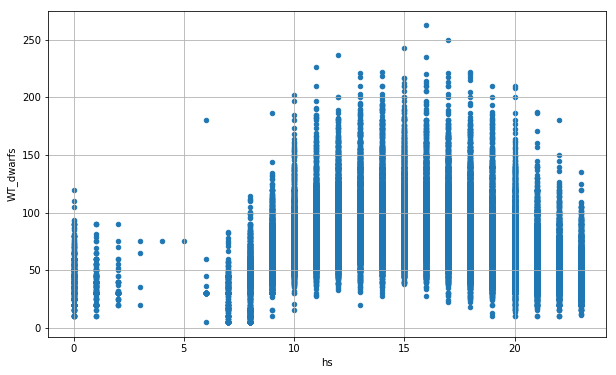

In [6]:
dwarfs=dwarfs[dwarfs['SPOSTMIN']>0]
dwarfs[['day','time']]=dwarfs['datetime'].str.split(' ', expand=True)
dwarfs[['hs','min','sec']]=dwarfs['time'].str.split(':', expand=True)
dwarfs=dwarfs.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
dwarfs['hs']=pd.to_numeric(dwarfs['hs'])
mean_dwarfs = dwarfs[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_dwarfs = mean_dwarfs.rename(columns={'SPOSTMIN': 'WT_dwarfs'})
mean_dwarfs.plot.scatter(x='hs', y='WT_dwarfs', figsize=(10,6), grid=True)

As we can see there is a scatter in the hour: not all the days are the same!

In [7]:
mean_dwarfs['WT_dwarfs'].isnull().any()

False

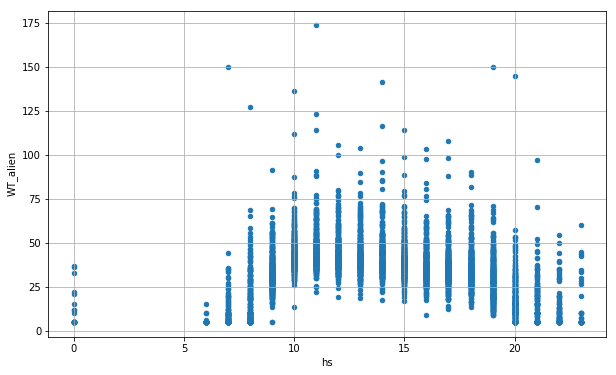

In [8]:
alien=alien[alien['SPOSTMIN']>0]
alien[['day','time']]=alien['datetime'].str.split(' ', expand=True)
alien[['hs','min','sec']]=alien['time'].str.split(':', expand=True)
alien=alien.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
alien['hs']=pd.to_numeric(alien['hs'])
mean_alien = alien[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_alien = mean_alien.rename(columns={'SPOSTMIN': 'WT_alien'})
mean_alien.plot.scatter(x='hs', y='WT_alien', figsize=(10,6), grid=True)

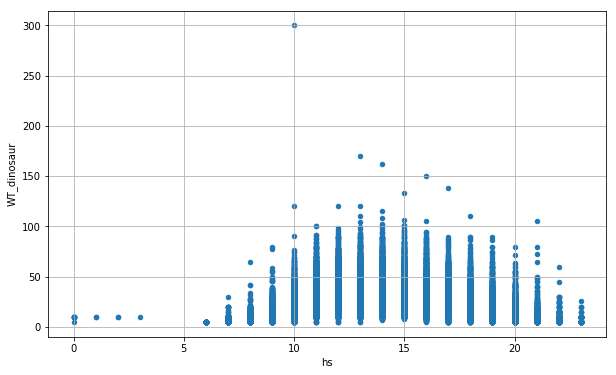

In [9]:
dinosaur=dinosaur[dinosaur['SPOSTMIN']>0]
dinosaur[['day','time']]=dinosaur['datetime'].str.split(' ', expand=True)
dinosaur[['hs','min','sec']]=dinosaur['time'].str.split(':', expand=True)
dinosaur=dinosaur.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
dinosaur['hs']=pd.to_numeric(dinosaur['hs'])
mean_dinosaur = dinosaur[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_dinosaur = mean_dinosaur.rename(columns={'SPOSTMIN': 'WT_dinosaur'})
mean_dinosaur.plot.scatter(x='hs', y='WT_dinosaur', figsize=(10,6), grid=True)

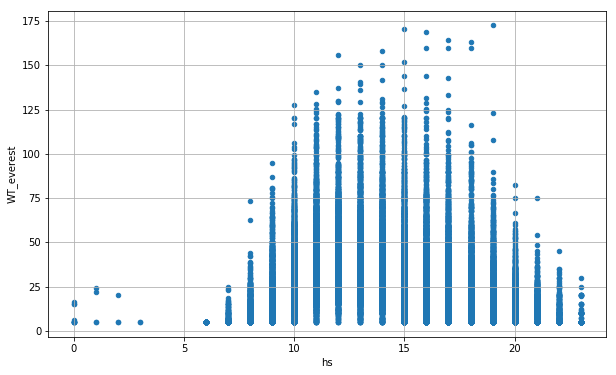

In [10]:
everest=everest[everest['SPOSTMIN']>0]
everest[['day','time']]=everest['datetime'].str.split(' ', expand=True)
everest[['hs','min','sec']]=everest['time'].str.split(':', expand=True)
everest=everest.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
everest['hs']=pd.to_numeric(everest['hs'])
mean_everest = everest[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_everest = mean_everest.rename(columns={'SPOSTMIN': 'WT_everest'})
mean_everest.plot.scatter(x='hs', y='WT_everest', figsize=(10,6), grid=True)

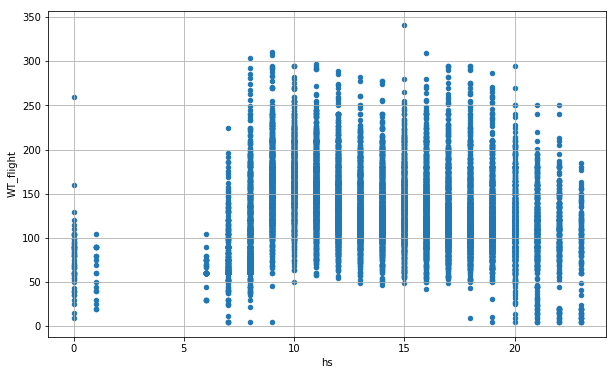

In [11]:
flight=flight[flight['SPOSTMIN']>0]
flight[['day','time']]=flight['datetime'].str.split(' ', expand=True)
flight[['hs','min','sec']]=flight['time'].str.split(':', expand=True)
flight=flight.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
flight['hs']=pd.to_numeric(flight['hs'])
mean_flight = flight[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_flight = mean_flight.rename(columns={'SPOSTMIN': 'WT_flight'})
mean_flight.plot.scatter(x='hs', y='WT_flight', figsize=(10,6), grid=True)

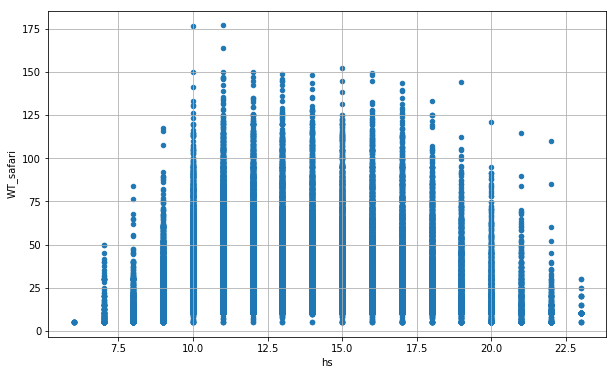

In [12]:
safari=safari[safari['SPOSTMIN']>0]
safari[['day','time']]=safari['datetime'].str.split(' ', expand=True)
safari[['hs','min','sec']]=safari['time'].str.split(':', expand=True)
safari=safari.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
safari['hs']=pd.to_numeric(safari['hs'])
mean_safari = safari[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_safari = mean_safari.rename(columns={'SPOSTMIN': 'WT_safari'})
mean_safari.plot.scatter(x='hs', y='WT_safari', figsize=(10,6), grid=True)

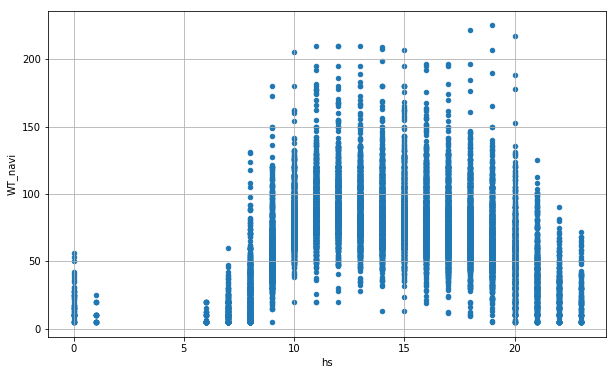

In [13]:
navi=navi[navi['SPOSTMIN']>0]
navi[['day','time']]=navi['datetime'].str.split(' ', expand=True)
navi[['hs','min','sec']]=navi['time'].str.split(':', expand=True)
navi=navi.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
navi['hs']=pd.to_numeric(navi['hs'])
mean_navi = navi[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_navi = mean_navi.rename(columns={'SPOSTMIN': 'WT_navi'})
mean_navi.plot.scatter(x='hs', y='WT_navi', figsize=(10,6), grid=True)

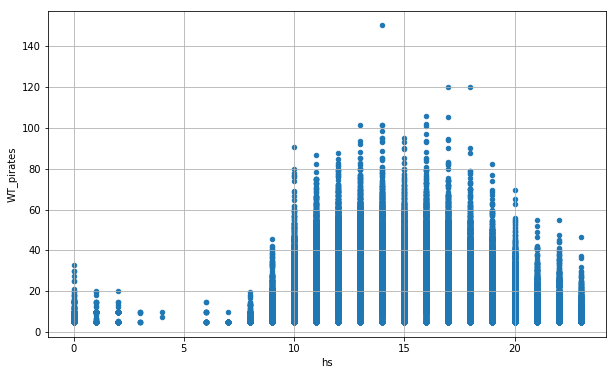

In [14]:
pirates=pirates[pirates['SPOSTMIN']>0]
pirates[['day','time']]=pirates['datetime'].str.split(' ', expand=True)
pirates[['hs','min','sec']]=pirates['time'].str.split(':', expand=True)
pirates=pirates.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
pirates['hs']=pd.to_numeric(pirates['hs'])
mean_pirates = pirates[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_pirates = mean_pirates.rename(columns={'SPOSTMIN': 'WT_pirates'})
mean_pirates.plot.scatter(x='hs', y='WT_pirates', figsize=(10,6), grid=True)

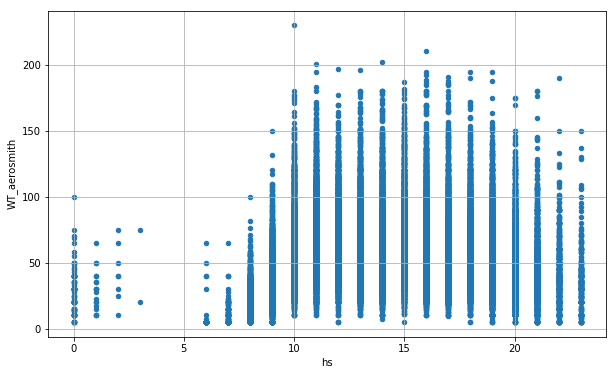

In [15]:
aerosmith=aerosmith[aerosmith['SPOSTMIN']>0]
aerosmith[['day','time']]=aerosmith['datetime'].str.split(' ', expand=True)
aerosmith[['hs','min','sec']]=aerosmith['time'].str.split(':', expand=True)
aerosmith=aerosmith.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
aerosmith['hs']=pd.to_numeric(aerosmith['hs'])
mean_aerosmith = aerosmith[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_aerosmith = mean_aerosmith.rename(columns={'SPOSTMIN': 'WT_aerosmith'})
mean_aerosmith.plot.scatter(x='hs', y='WT_aerosmith', figsize=(10,6), grid=True)

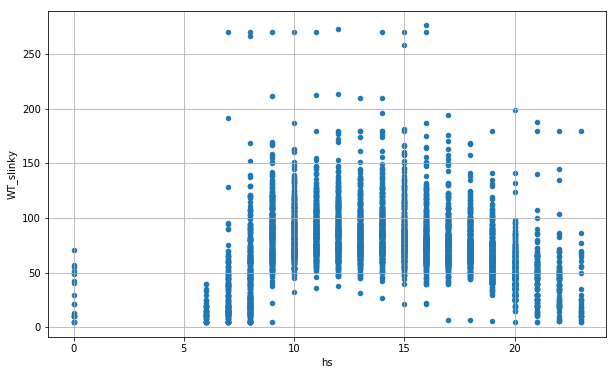

In [16]:
slinky=slinky[slinky['SPOSTMIN']>0]
slinky[['day','time']]=slinky['datetime'].str.split(' ', expand=True)
slinky[['hs','min','sec']]=slinky['time'].str.split(':', expand=True)
slinky=slinky.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
slinky['hs']=pd.to_numeric(slinky['hs'])
mean_slinky = slinky[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_slinky = mean_slinky.rename(columns={'SPOSTMIN': 'WT_slinky'})
mean_slinky.plot.scatter(x='hs', y='WT_slinky', figsize=(10,6), grid=True)

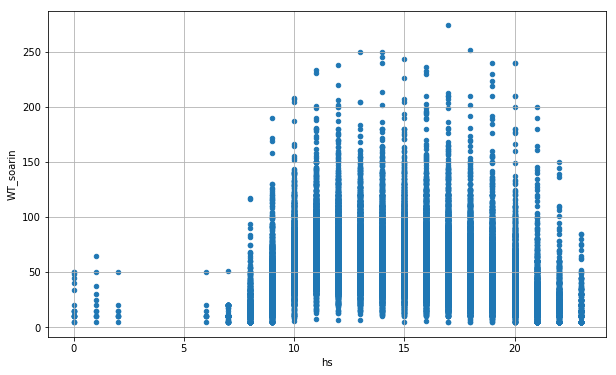

In [17]:
soarin=soarin[soarin['SPOSTMIN']>0]
soarin[['day','time']]=soarin['datetime'].str.split(' ', expand=True)
soarin[['hs','min','sec']]=soarin['time'].str.split(':', expand=True)
soarin=soarin.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
soarin['hs']=pd.to_numeric(soarin['hs'])
mean_soarin = soarin[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_soarin = mean_soarin.rename(columns={'SPOSTMIN': 'WT_soarin'})
mean_soarin.plot.scatter(x='hs', y='WT_soarin', figsize=(10,6), grid=True)

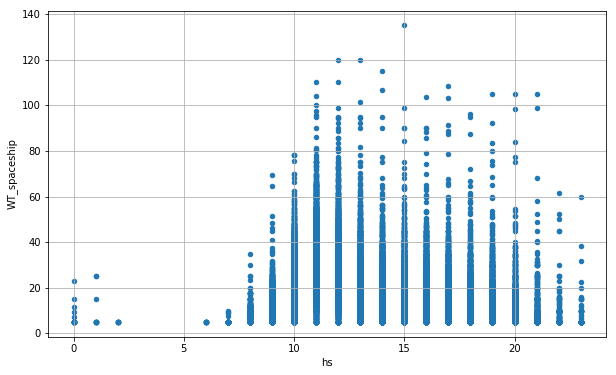

In [18]:
spaceship=spaceship[spaceship['SPOSTMIN']>0]
spaceship[['day','time']]=spaceship['datetime'].str.split(' ', expand=True)
spaceship[['hs','min','sec']]=spaceship['time'].str.split(':', expand=True)
spaceship=spaceship.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
spaceship['hs']=pd.to_numeric(spaceship['hs'])
mean_spaceship = spaceship[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_spaceship = mean_spaceship.rename(columns={'SPOSTMIN': 'WT_spaceship'})
mean_spaceship.plot.scatter(x='hs', y='WT_spaceship', figsize=(10,6), grid=True)

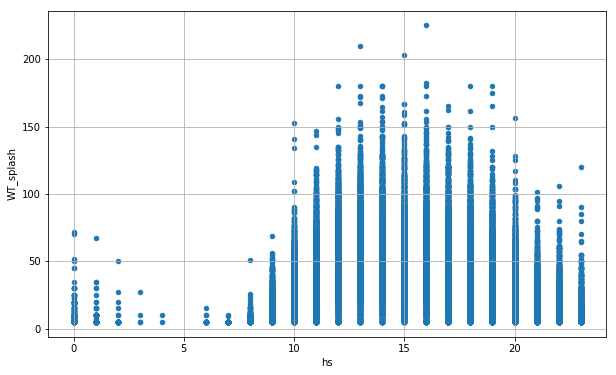

In [19]:
splash=splash[splash['SPOSTMIN']>0]
splash[['day','time']]=splash['datetime'].str.split(' ', expand=True)
splash[['hs','min','sec']]=splash['time'].str.split(':', expand=True)
splash=splash.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
splash['hs']=pd.to_numeric(splash['hs'])
mean_splash = splash[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_splash = mean_splash.rename(columns={'SPOSTMIN': 'WT_splash'})
mean_splash.plot.scatter(x='hs', y='WT_splash', figsize=(10,6), grid=True)

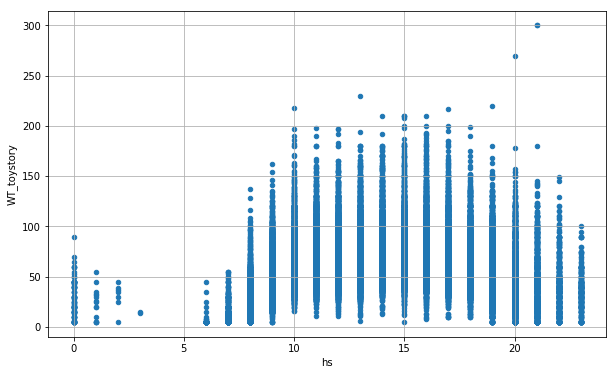

In [20]:
toystory=toystory[toystory['SPOSTMIN']>0]
toystory[['day','time']]=toystory['datetime'].str.split(' ', expand=True)
toystory[['hs','min','sec']]=toystory['time'].str.split(':', expand=True)
toystory=toystory.drop(['datetime','SACTMIN','day','time','min','sec'], axis = 1)
toystory['hs']=pd.to_numeric(toystory['hs'])
mean_toystory = toystory[['date','hs','SPOSTMIN']].groupby(['date','hs'], as_index=False).mean()
mean_toystory = mean_toystory.rename(columns={'SPOSTMIN': 'WT_toystory'})
mean_toystory.plot.scatter(x='hs', y='WT_toystory', figsize=(10,6), grid=True)

let's merge all the tables by date and hs

In [21]:
from functools import reduce

In [22]:
dfs=[mean_dwarfs, mean_alien, mean_dinosaur, mean_everest, mean_flight, mean_safari, mean_navi, mean_pirates, mean_aerosmith, mean_slinky, mean_soarin, mean_spaceship, mean_splash, mean_toystory]

In [23]:
rides = reduce(lambda left,right: pd.merge(left,right,on=['date','hs'],how='outer', suffixes=('_left', '_right')), dfs) #same order than dfs

In [24]:
rides.head()

,date,hs,WT_dwarfs,WT_alien,WT_dinosaur,WT_everest,WT_flight,WT_safari,WT_navi,WT_pirates,WT_aerosmith,WT_slinky,WT_soarin,WT_spaceship,WT_splash,WT_toystory
0,01/01/2015,0,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.875,NaN,NaN,NaN,NaN,5.0,NaN
1,01/01/2015,1,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000,NaN,NaN,NaN,NaN,5.0,NaN
2,01/01/2015,7,45.000000,NaN,5.000,5.000000,NaN,5.00,NaN,NaN,5.0,NaN,10.000,5.0,5.0,20.000000
3,01/01/2015,8,78.333333,NaN,9.375,5.000000,NaN,8.75,NaN,NaN,25.0,NaN,30.625,5.0,5.0,54.500000
4,01/01/2015,9,103.333333,NaN,11.250,11.666667,NaN,5.00,NaN,NaN,50.0,NaN,56.875,7.5,5.0,71.666667


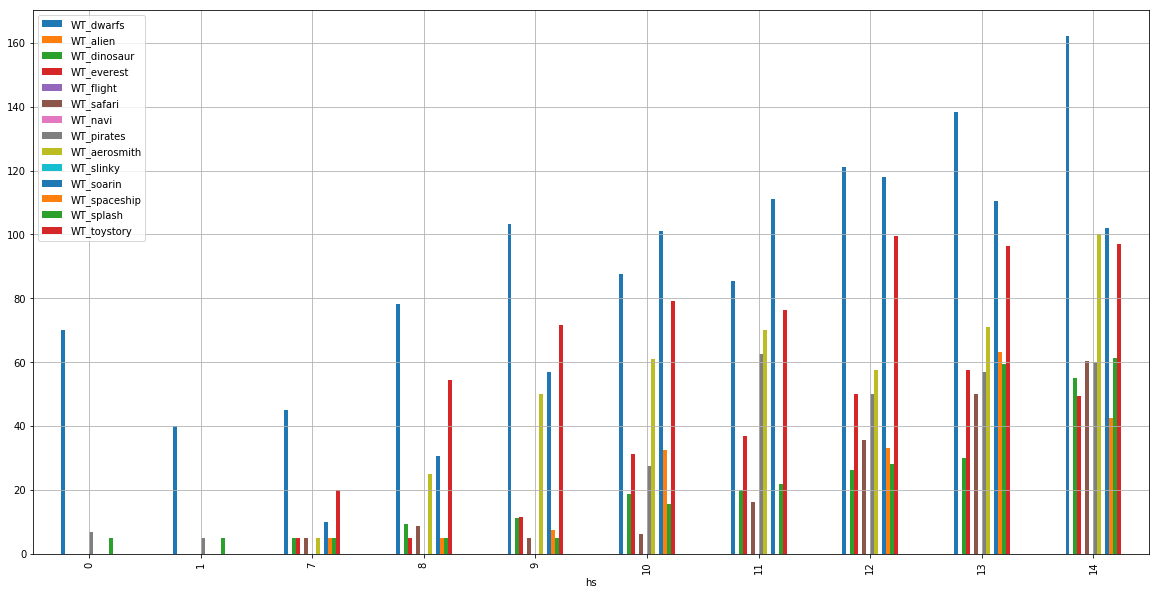

In [25]:
rides[:10].plot(x="hs", y=["WT_dwarfs", "WT_alien", "WT_dinosaur", "WT_everest", "WT_flight", "WT_safari", "WT_navi", "WT_pirates", "WT_aerosmith", "WT_slinky", "WT_soarin", "WT_spaceship", "WT_splash", "WT_toystory"], kind="bar", figsize=(20,10), grid=True)

In [26]:
meta_data=metadata[['DATE', 'DAYOFWEEK', 'DAYOFYEAR', 'MONTHOFYEAR', 'YEAR', 'SEASON']]
meta_data = meta_data.rename(columns={'DATE': 'date'})

In [27]:
full = pd.merge(meta_data,rides,on=['date'],how='outer')

In [28]:
full.head()

,date,DAYOFWEEK,DAYOFYEAR,MONTHOFYEAR,YEAR,SEASON,hs,WT_dwarfs,WT_alien,WT_dinosaur,...,WT_flight,WT_safari,WT_navi,WT_pirates,WT_aerosmith,WT_slinky,WT_soarin,WT_spaceship,WT_splash,WT_toystory
0,01/01/2012,1.0,0.0,1.0,2012.0,CHRISTMAS PEAK,8,NaN,NaN,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2012,1.0,0.0,1.0,2012.0,CHRISTMAS PEAK,9,NaN,NaN,10.0,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2012,1.0,0.0,1.0,2012.0,CHRISTMAS PEAK,11,NaN,NaN,7.5,...,NaN,15.0,NaN,NaN,NaN,NaN,57.5,NaN,NaN,NaN
3,01/01/2012,1.0,0.0,1.0,2012.0,CHRISTMAS PEAK,12,NaN,NaN,30.0,...,NaN,10.0,NaN,5.0,NaN,NaN,60.0,NaN,28.75,60.0
4,01/01/2012,1.0,0.0,1.0,2012.0,CHRISTMAS PEAK,13,NaN,NaN,20.0,...,NaN,NaN,NaN,10.0,NaN,NaN,75.0,NaN,NaN,105.0


## Impact of a new ride

In 2017 two rides were added to Animal Kingdom

In 2018 two rides were added to Hollywood Studios

How were the wait times of others rides at the same park affected?

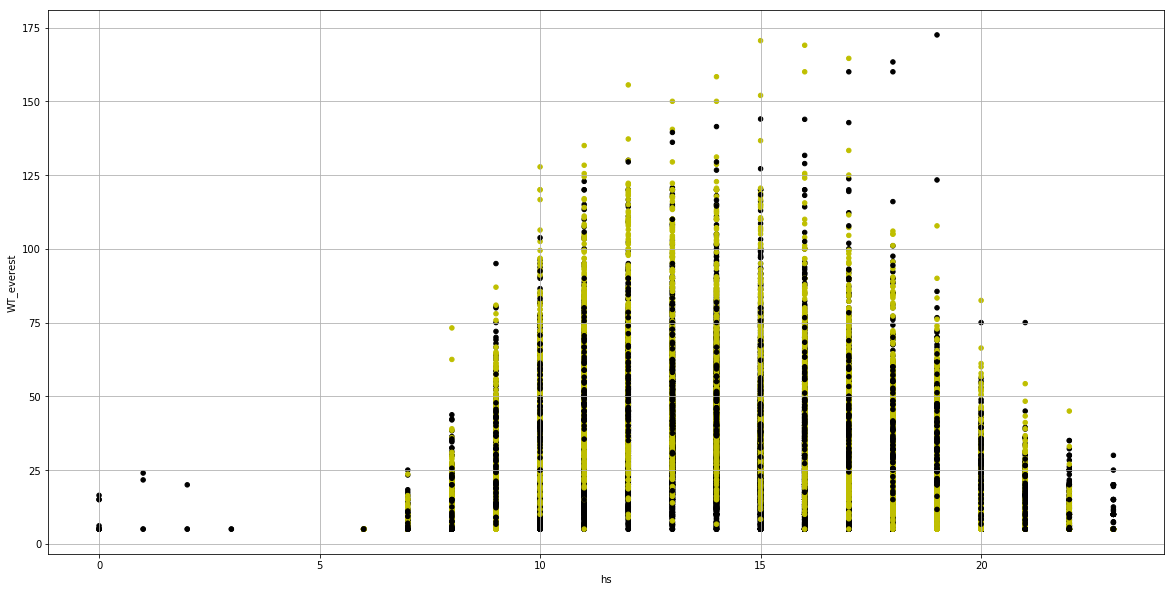

In [109]:
colors = np.where(full["YEAR"]>2017,'y','k')
full.plot.scatter(x="hs",y="WT_everest",c=colors, figsize=(20,10), grid=True)

we can't tell anything from this kind of plot. we need to make some kind of distintion between days.

First, let's put togheter all holidays and peak seasons.

In [30]:
count_peryear = full[['date','SEASON']].groupby('SEASON', as_index=False).count()
count_peryear

,SEASON,date
0,CHRISTMAS,2178
1,CHRISTMAS PEAK,801
2,COLUMBUS DAY,480
3,EASTER,2545
4,FALL,5051
5,HALLOWEEN,604
6,JERSEY WEEK,1171
7,JULY 4TH,606
8,MARDI GRAS,368
9,MARTIN LUTHER KING JUNIOR DAY,1115


In [70]:
holiday = full['SEASON'].str.contains('CHRISTMAS') | full['SEASON'].str.contains('SUMMER') | full['SEASON'].str.contains('JERSEY')   | full['SEASON'].str.contains('THANKSGIVING')
special_day = full['SEASON'].str.contains('COLUMBUS') | full['SEASON'].str.contains('EASTER') | full['SEASON'].str.contains('HALLOWEEN')  | full['SEASON'].str.contains('JULY')   | full['SEASON'].str.contains('MARDI')   | full['SEASON'].str.contains('KING')  | full['SEASON'].str.contains('MEMORIAL')  | full['SEASON'].str.contains('PRESIDENT') 
low = full['SEASON'].str.contains('SEPTEMBER') | full['SEASON'].str.contains('SEPTEMBER') 
normal = full['SEASON'].str.contains('FALL') | full['SEASON'].str.contains('SPRING')
winter = full['SEASON'].str.contains('WINTER') |full['SEASON'].str.contains('WINTER')

We will analice normal behavior, then we only take into account low, normal and winter season. During holidays there is a lot of crowds and every time wait is full. 

### Animal Kingdom

What happend with the rides at AK (everest and dinosaur) when pandora area (navi,flight) opened?

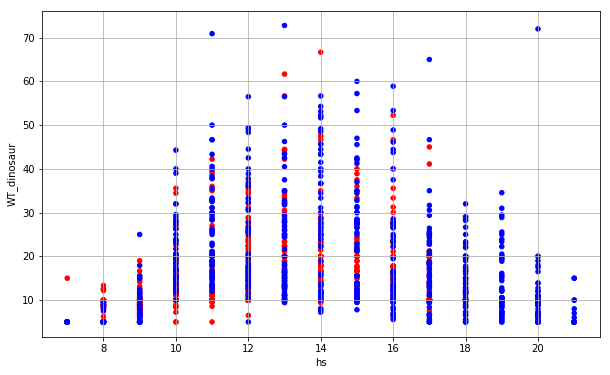

In [122]:
col = np.where(full[low].YEAR<2017,'r',np.where(full[low].YEAR>=2017,'b','r'))
full[low].plot.scatter(x="hs",y="WT_dinosaur",c=col, figsize=(10,6), grid=True)

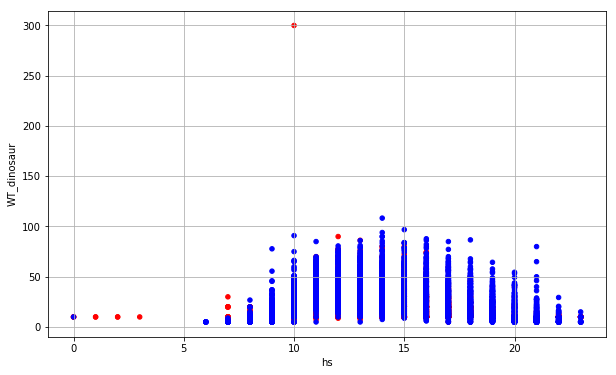

In [129]:
col = np.where(full[normal].YEAR<2017,'r',np.where(full[normal].YEAR>=2017,'b','r'))
full[normal].plot.scatter(x="hs",y="WT_dinosaur",c=col, figsize=(10,6), grid=True)

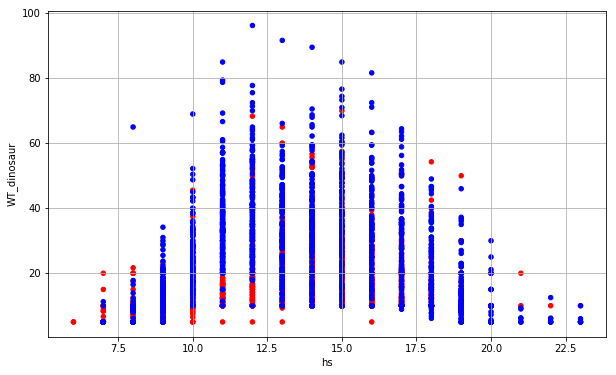

In [137]:
col = np.where(full[winter].YEAR<2017,'r',np.where(full[winter].YEAR>=2017,'b','r'))
full[winter].plot.scatter(x="hs",y="WT_dinosaur",c=col, figsize=(10,6), grid=True)

In [84]:
full_low=full[low]
full_winter=full[winter]
full_normal=full[normal]

there are some clear outliers in the data, let's remove it

In [156]:
full_low=full_low[full_low['WT_everest']<70] 
full_low=full_low[full_low['WT_safari']<80] 
full_low=full_low[full_low['WT_dinosaur']<60] 
full_normal=full_normal[full_normal['WT_everest']<118]
full_normal=full_normal[full_normal['WT_safari']<140]
full_normal=full_normal[full_normal['WT_dinosaur']<90]
full_winter=full_normal[full_normal['WT_everest']<100]
full_winter=full_normal[full_normal['WT_safari']<120]
full_winter=full_normal[full_normal['WT_dinosaur']<75]
#full_winter.plot.scatter(x="hs",y="WT_dinosaur", figsize=(10,6), grid=True)

Let's differentiate by the days of the week and before/after june 2017

In [221]:
sunday_w = full_winter['DAYOFWEEK']==1.0
monday_w = full_winter['DAYOFWEEK']==2.0
tuesday_w = full_winter['DAYOFWEEK']==3.0
wednesday_w = full_winter['DAYOFWEEK']==4.0 
thursday_w = full_winter['DAYOFWEEK']==5.0
friday_w = full_winter['DAYOFWEEK']==6.0
saturday_w = full_winter['DAYOFWEEK']==7.0
from_2018_w = full_winter['YEAR']>=2018.0
in_2017_y_w = full_winter['YEAR']==2017.0
in_2017_m_w = full_winter['MONTHOFYEAR']>=6.0
in_2017_w = in_2017_y_w & in_2017_y_w
after_w = from_2018_w | in_2017_w
before_w = ~after_w

In [194]:
sunday_w_mean_after = full_winter[after_w & sunday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
#sunday_w_mean_after.plot.scatter(x="hs",y="WT_dinosaur", figsize=(10,6), grid=True)
sunday_w_mean_before = full_winter[before_w & sunday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()

In [198]:
clean_sun = pd.merge(sunday_w_mean_before,sunday_w_mean_after,on=['hs'],how='outer', suffixes=('_sun_w_bef', '_sun_w_aft'),)
#clean

In [208]:
#clean_sun.plot(x='hs', y=['WT_dinosaur_sun_w_bef', 'WT_dinosaur_sun_w_aft'], figsize=(10,5), grid=True)

In [195]:
monday_w_mean_after = full_winter[after_w & monday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
#sunday_w_mean_after.plot.scatter(x="hs",y="WT_dinosaur", figsize=(10,6), grid=True)
monday_w_mean_before = full_winter[before_w & monday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()

In [209]:
clean_mon = pd.merge(monday_w_mean_before,monday_w_mean_after,on=['hs'],how='outer', suffixes=('_mon_w_bef', '_mon_w_aft'),)
#clean_mon.plot(x='hs', y=['WT_dinosaur_mon_w_bef', 'WT_dinosaur_mon_w_aft'], figsize=(10,5), grid=True)

In [263]:
tuesday_w_mean_after = full_winter[after_w & tuesday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
tuesday_w_mean_before = full_winter[before_w & tuesday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
clean_tues = pd.merge(tuesday_w_mean_before,tuesday_w_mean_after,on=['hs'],how='outer', suffixes=('_tues_w_bef', '_tues_w_aft'),)

In [212]:
wednesday_w_mean_after = full_winter[after_w & wednesday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
wednesday_w_mean_before = full_winter[before_w & wednesday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
clean_wednes = pd.merge(wednesday_w_mean_before,wednesday_w_mean_after,on=['hs'],how='outer', suffixes=('_wednes_w_bef', '_wednes_w_aft'),)

In [214]:
thursday_w_mean_after = full_winter[after_w & thursday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
thursday_w_mean_before = full_winter[before_w & thursday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
clean_thurs = pd.merge(thursday_w_mean_before,thursday_w_mean_after,on=['hs'],how='outer', suffixes=('_thurs_w_bef', '_thurs_w_aft'),)

In [217]:
friday_w_mean_after = full_winter[after_w & friday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
friday_w_mean_before = full_winter[before_w & friday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
clean_fri = pd.merge(friday_w_mean_before,friday_w_mean_after,on=['hs'],how='outer', suffixes=('_fri_w_bef', '_fri_w_aft'),)

In [222]:
saturday_w_mean_after = full_winter[after_w & saturday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
saturday_w_mean_before = full_winter[before_w & saturday_w][['WT_dinosaur','hs']].groupby('hs', as_index=False).mean()
clean_satur = pd.merge(saturday_w_mean_before,saturday_w_mean_after,on=['hs'],how='outer', suffixes=('_satur_w_bef', '_satur_w_aft'),)

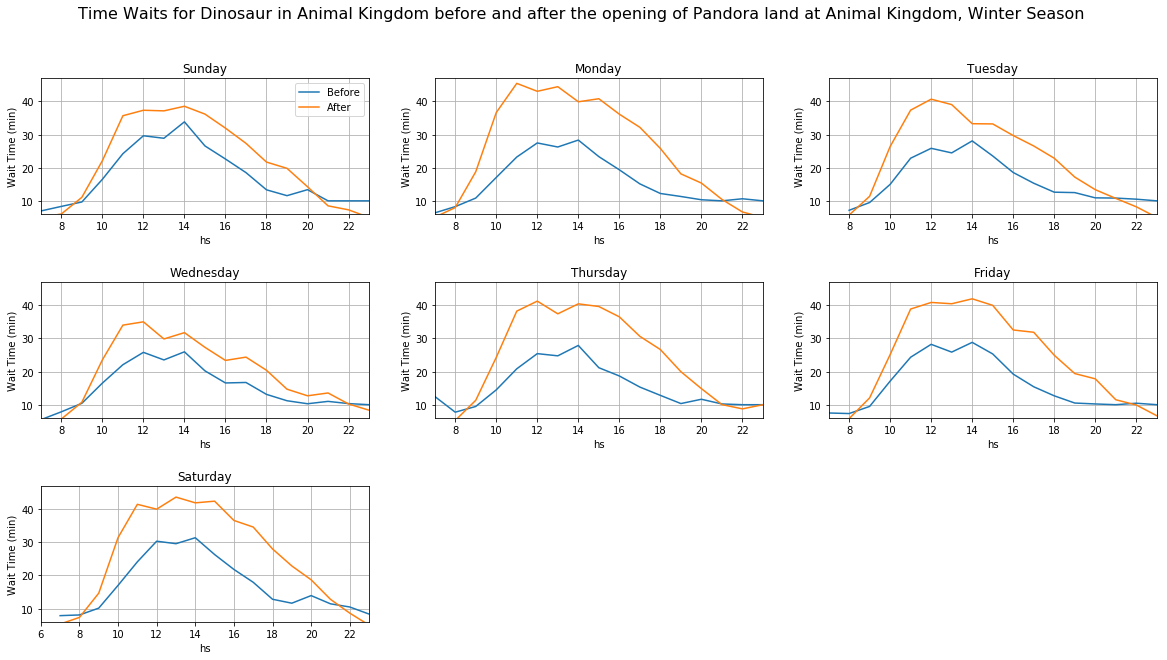

In [305]:
fig = plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax1.title.set_text('Sunday')
ax2.title.set_text('Monday')
ax3.title.set_text('Tuesday')
ax4.title.set_text('Wednesday')
ax5.title.set_text('Thursday')
ax6.title.set_text('Friday')
ax7.title.set_text('Saturday')
ax1.set_xlim(10, 20)
ax1.set_ylim(6, 47)
ax2.set_xlim(10, 20)
ax2.set_ylim(6, 47)
ax3.set_xlim(10, 20)
ax3.set_ylim(6, 47)
ax4.set_xlim(10, 20)
ax4.set_ylim(6, 47)
ax5.set_xlim(10, 20)
ax5.set_ylim(6, 47)
ax6.set_xlim(10, 20)
ax6.set_ylim(6, 47)
ax7.set_xlim(10, 20)
ax7.set_ylim(6, 47)
ax1.set_ylabel('Wait Time (min)')
ax2.set_ylabel('Wait Time (min)')
ax3.set_ylabel('Wait Time (min)')
ax4.set_ylabel('Wait Time (min)')
ax5.set_ylabel('Wait Time (min)')
ax6.set_ylabel('Wait Time (min)')
ax7.set_ylabel('Wait Time (min)')
ax1.set_xlabel('Time of the day (hs)')
ax2.set_xlabel('Time of the day (hs)')
ax3.set_xlabel('Time of the day (hs)')
ax4.set_xlabel('Time of the day (hs)')
ax5.set_xlabel('Time of the day (hs)')
ax6.set_xlabel('Time of the day (hs)')
ax7.set_xlabel('Time of the day (hs)')
fig.suptitle('Time Waits for Dinosaur in Animal Kingdom before and after the opening of Pandora land at Animal Kingdom, Winter Season', fontsize=16)
clean_sun.plot(x='hs', y=['WT_dinosaur_sun_w_bef', 'WT_dinosaur_sun_w_aft'], ax=ax1, figsize=(20,10), grid=True, label=['Before','After'])
clean_mon.plot(x='hs', y=['WT_dinosaur_mon_w_bef', 'WT_dinosaur_mon_w_aft'], ax=ax2,figsize=(20,10), grid=True, legend=False)
clean_tues.plot(x='hs', y=['WT_dinosaur_tues_w_bef', 'WT_dinosaur_tues_w_aft'], ax=ax3, figsize=(20,10), grid=True, legend=False)
clean_wednes.plot(x='hs', y=['WT_dinosaur_wednes_w_bef', 'WT_dinosaur_wednes_w_aft'], ax=ax4, figsize=(20,10), grid=True, legend=False)
clean_thurs.plot(x='hs', y=['WT_dinosaur_thurs_w_bef', 'WT_dinosaur_thurs_w_aft'], ax=ax5, figsize=(20,10), grid=True, legend=False)
clean_fri.plot(x='hs', y=['WT_dinosaur_fri_w_bef', 'WT_dinosaur_fri_w_aft'], ax=ax6, figsize=(20,10), grid=True, legend=False)
clean_satur.plot(x='hs', y=['WT_dinosaur_satur_w_bef', 'WT_dinosaur_satur_w_aft'], ax=ax7, figsize=(20,10), grid=True, legend=False)
plt.savefig('Figure1.jpg')

After the opening of Pandora the wait times incresed! This is probably to a increment in the amount of people in the park due to the opening of Pandora. We can also notice that the behaviour is the same befora and after the event.

let's see what happend for everest on a normal season

In [256]:
sunday_n = full_normal['DAYOFWEEK']==1.0
monday_n = full_normal['DAYOFWEEK']==2.0
tuesday_n = full_normal['DAYOFWEEK']==3.0
wednesday_n = full_normal['DAYOFWEEK']==4.0 
thursday_n = full_normal['DAYOFWEEK']==5.0
friday_n = full_normal['DAYOFWEEK']==6.0
saturday_n = full_normal['DAYOFWEEK']==7.0
from_2018_n = full_normal['YEAR']>=2018.0
in_2017_y_n = full_normal['YEAR']==2017.0
in_2017_m_n = full_normal['MONTHOFYEAR']>=6.0
in_2017_n = in_2017_y_n & in_2017_y_n
after_n = from_2018_n | in_2017_n
before_n = ~after_n

In [277]:
sunday_n_mean_after = full_normal[after_n & sunday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
#sunday_w_mean_after.plot.scatter(x="hs",y="WT_dinosaur", figsize=(10,6), grid=True)
sunday_n_mean_before = full_normal[before_n & sunday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()

In [279]:
clean_sun_n = pd.merge(sunday_n_mean_before,sunday_n_mean_after,on=['hs'],how='outer', suffixes=('_sun_n_bef', '_sun_n_aft'),)

In [259]:
monday_n_mean_after = full_normal[after_n & monday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
#sunday_w_mean_after.plot.scatter(x="hs",y="WT_dinosaur", figsize=(10,6), grid=True)
monday_n_mean_before = full_normal[before_n & monday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()

In [260]:
clean_mon_n = pd.merge(monday_n_mean_before,monday_n_mean_after,on=['hs'],how='outer', suffixes=('_mon_n_bef', '_mon_n_aft'),)
#clean_mon.plot(x='hs', y=['WT_dinosaur_mon_w_bef', 'WT_dinosaur_mon_w_aft'], figsize=(10,5), grid=True)

In [264]:
tuesday_n_mean_after = full_normal[after_n & tuesday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
tuesday_n_mean_before = full_normal[before_n & tuesday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
clean_tues_n = pd.merge(tuesday_n_mean_before,tuesday_n_mean_after,on=['hs'],how='outer', suffixes=('_tues_n_bef', '_tues_n_aft'),)

In [265]:
wednesday_n_mean_after = full_normal[after_n & wednesday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
wednesday_n_mean_before = full_normal[before_n & wednesday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
clean_wednes_n = pd.merge(wednesday_n_mean_before,wednesday_n_mean_after,on=['hs'],how='outer', suffixes=('_wednes_n_bef', '_wednes_n_aft'),)

In [266]:
thursday_n_mean_after = full_normal[after_n & thursday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
thursday_n_mean_before = full_normal[before_n & thursday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
clean_thurs_n = pd.merge(thursday_n_mean_before,thursday_n_mean_after,on=['hs'],how='outer', suffixes=('_thurs_n_bef', '_thurs_n_aft'),)

In [267]:
friday_n_mean_after = full_normal[after_n & friday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
friday_n_mean_before = full_normal[before_n & friday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
clean_fri_n = pd.merge(friday_n_mean_before,friday_n_mean_after,on=['hs'],how='outer', suffixes=('_fri_n_bef', '_fri_n_aft'),)

In [293]:
saturday_n_mean_after = full_normal[after_n & saturday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
saturday_n_mean_before = full_normal[before_n & saturday_n][['WT_everest','hs']].groupby('hs', as_index=False).mean()
clean_satur_n = pd.merge(saturday_n_mean_before,saturday_n_mean_after,on=['hs'],how='outer', suffixes=('_satur_n_bef', '_satur_n_aft'),)
clean_satur_n=clean_satur_n.drop(clean_satur_n.index[17])

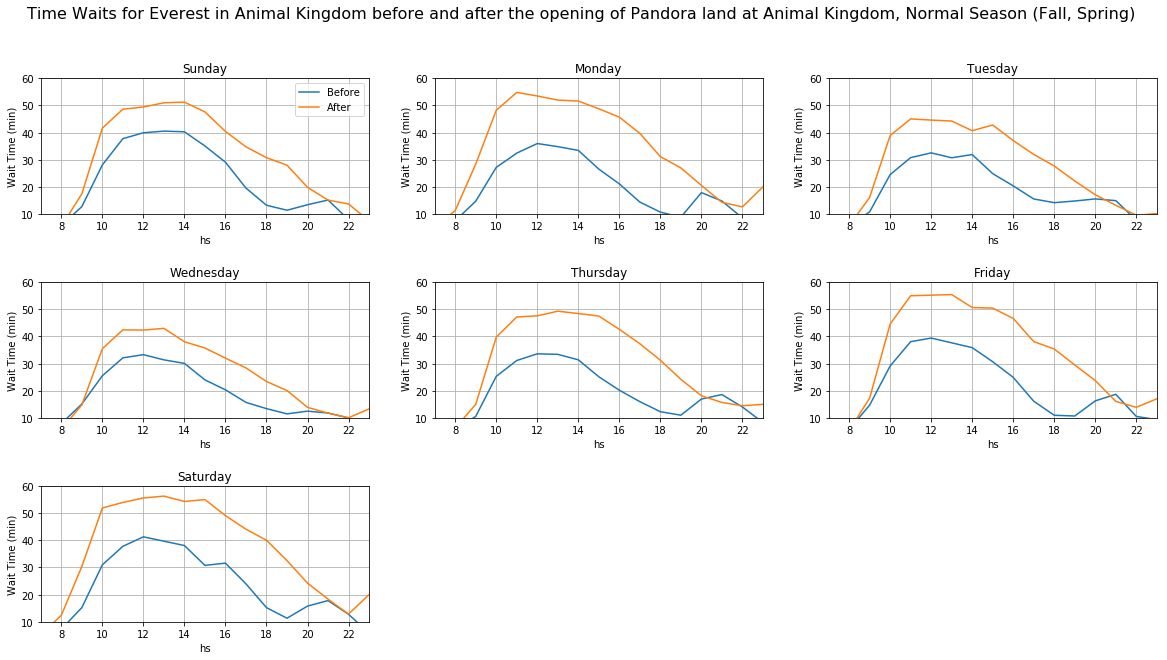

In [304]:
fig2 = plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
ax1 = fig2.add_subplot(331)
ax2 = fig2.add_subplot(332)
ax3 = fig2.add_subplot(333)
ax4 = fig2.add_subplot(334)
ax5 = fig2.add_subplot(335)
ax6 = fig2.add_subplot(336)
ax7 = fig2.add_subplot(337)
ax1.title.set_text('Sunday')
ax2.title.set_text('Monday')
ax3.title.set_text('Tuesday')
ax4.title.set_text('Wednesday')
ax5.title.set_text('Thursday')
ax6.title.set_text('Friday')
ax7.title.set_text('Saturday')
ax1.set_xlim(10, 20)
ax1.set_ylim(10, 60)
ax2.set_xlim(10, 20)
ax2.set_ylim(10, 60)
ax3.set_xlim(10, 20)
ax3.set_ylim(10, 60)
ax4.set_xlim(10, 20)
ax4.set_ylim(10, 60)
ax5.set_xlim(10, 20)
ax5.set_ylim(10, 60)
ax6.set_xlim(10, 20)
ax6.set_ylim(10, 60)
ax7.set_xlim(10, 20)
ax7.set_ylim(10, 60)
ax1.set_ylabel('Wait Time (min)')
ax2.set_ylabel('Wait Time (min)')
ax3.set_ylabel('Wait Time (min)')
ax4.set_ylabel('Wait Time (min)')
ax5.set_ylabel('Wait Time (min)')
ax6.set_ylabel('Wait Time (min)')
ax7.set_ylabel('Wait Time (min)')
ax1.set_xlabel('Time of the day (hs)')
ax2.set_xlabel('Time of the day (hs)')
ax3.set_xlabel('Time of the day (hs)')
ax4.set_xlabel('Time of the day (hs)')
ax5.set_xlabel('Time of the day (hs)')
ax6.set_xlabel('Time of the day (hs)')
ax7.set_xlabel('Time of the day (hs)')
fig2.suptitle('Time Waits for Everest in Animal Kingdom before and after the opening of Pandora land at Animal Kingdom, Normal Season (Fall, Spring)', fontsize=16)
clean_sun_n.plot(x='hs', y=['WT_everest_sun_n_bef', 'WT_everest_sun_n_aft'], ax=ax1, figsize=(20,10), grid=True, label=['Before','After'])
clean_mon_n.plot(x='hs', y=['WT_everest_mon_n_bef', 'WT_everest_mon_n_aft'], ax=ax2,figsize=(20,10), grid=True, legend=False)
clean_tues_n.plot(x='hs', y=['WT_everest_tues_n_bef', 'WT_everest_tues_n_aft'], ax=ax3, figsize=(20,10), grid=True, legend=False)
clean_wednes_n.plot(x='hs', y=['WT_everest_wednes_n_bef', 'WT_everest_wednes_n_aft'], ax=ax4, figsize=(20,10), grid=True, legend=False)
clean_thurs_n.plot(x='hs', y=['WT_everest_thurs_n_bef', 'WT_everest_thurs_n_aft'], ax=ax5, figsize=(20,10), grid=True, legend=False)
clean_fri_n.plot(x='hs', y=['WT_everest_fri_n_bef', 'WT_everest_fri_n_aft'], ax=ax6, figsize=(20,10), grid=True, legend=False)
clean_satur_n.plot(x='hs', y=['WT_everest_satur_n_bef', 'WT_everest_satur_n_aft'], ax=ax7, figsize=(20,10), grid=True, legend=False)
plt.savefig('Figure2.jpg')

we have the same results!